# HW9 Decision Tree




# **ต้นไม้ตัดสินใจ (Decision Tree)** 
เป็นโมเดลทางคณิตศาสตร์ที่มีโครงสร้างเป็นกราฟลักษณะคล้ายต้นไม้ซึ่งถูกใช้เพื่อทำนายประเภทของวัตถุหรือสร้างแนวทางในการตัดสินใจ โดยพิจารณาจากค่าคุณลักษณะ (`attributes`) ข้อมูลมาทำการจำแนกประเภท (classification) ข้อมูลออกเป็นคลาสต่างๆเพื่อให้มนุษย์นำไปแปลผลเพื่อช่วยในการตัดสินใจได้ดียิ่งขึ้น Decision tree ได้รับความนิยมในการเอาไปใช้ในศาสตร์การเรียนรู้ของเครื่อง (machine learning) และการทำเหมืองข้อมูล (data mining)


โดยสิ่งที่เอามาใช้สร้าง decision tree นั่นก็คือ กลุ่มของข้อมูลที่มี attributes ร่วมกัน ตามตารางข้างล่างนี้ โดย attributes มี 2 ประเภท คือ คุณลักษณะเฉพาะ(`feature attribute`) ซึ่งเอามาใช้สร้าง node และ คุณลักษณะเป้าหมาย (`target attribute`) ซึ่งจะเอามาใช้สร้าง leaf
![](https://drive.google.com/uc?export=view&id=1-RARHaFS2R1FnKg8g5n0ID0m1WQ2WFgI)
ลักษณะของ decision tree เป็นลักษณะของต้นไม้กลับหัว มีองค์ประกอบด้วย 3 ส่วน คือ
1. ปม (`node`) ใช้ระบุ `ชื่อ feature attribute` ของข้อมูลซึ่งเมื่อข้อมูลได้ตกลงมาที่ node จะใช้ `attribute` ใน node นั้น เป็นตัวตัดสินใจว่าข้อมูลจะไปในทิศทางใด โดย `node` เริ่มต้นจะอยู่ที่จุดบนสุดของกราฟเรียกว่าปมราก (`root node`) และถ้า node นั้นแตก node อื่นๆออกมา(รวมถึงใบ) จะเรียก node นั้นว่า ปมพ่อ (`parent node`)
2. กิ่ง (`branch`) ใช้ระบุ`ค่าของ attribute` จาก `node` ที่แตกกิ่งออกมา จำนวนกิ่งที่แตกจะเท่ากับ**จำนวน**`ค่าของ attribute` ใน `node` นั้นๆ
3. ใบ (`leaf` หรือ `leaf node`) ใช้ระบุคลาสของปัญหา, ผลลัพธ์การตัดสินใจ หรือค่าของ `target attribute`


แต่ละเส้นทาง (path) จาก root node ถึง leaf node สามารถแสดงให้อยู่ในรูป `condition` ได้ดังนี้


```
IF Outlook=="sunny" AND Humidity=="high" : PlayTennis = "No"
IF Outlook=="sunny" AND Humidity=="normal" : PlayTennis = "Yes"
IF Outlook=="overcast" : PlayTennis = "Yes"
...
```


ในปัจจุบันมีอัลกอริทึมหลายแบบที่ถูกสร้างขึ้นมาเพื่อใช้ในการคัดเลือก `attribute` ที่เหมาะสมเพื่อที่จะนำมาสร้างต้นไม้ที่ดีที่สุด (optimal tree) โดยที่นิยมในปัจจุบันได้แก่ CART algorithm, ID3 algorithm, C4.5 algorithm ซึ่งในโจทย์ข้อนี้จะใช้ `ID3 algorithm`




##ID3 algorithm (Iterative Dichotomiser 3) 
- สำหรับผู้ต้องการอ่านฉบับภาษาอังกฤษแบบย่อ (เนื้อหาคล้ายกัน) : https://www.saedsayad.com/decision_tree.htm 
- สำหรับคนขี้เกียจอ่าน คลิปโดย Indian guy สอน (เนื้อหาคล้ายกัน) : https://youtu.be/UdTKxGQvYdc

เป็นอัลกอริทึมที่ถูกเสนอขึ้นโดย J.R.Quinlan (1986) โดยใช้ค่าเกน (`Information Gain`) มาช่วยในการคัดเลือก feature attributes ที่เหมาะสมในแต่ละปม ซึ่งค่าเกณฑ์นี้คำนวณได้โดยอาศัยความรู้จากทฤษฎีสารสนเทศ (Information Theory) โดยกล่าวถึงการวัดปริมาณข้อมูล(สารสนเทศ)ด้วยค่าเอ็นโทรปี (`Entropy`)

* ในเชิงนิยาม คำว่า"ข้อมูล"กับ"สารสนเทศ"มีความหมายที่ต่างกัน แต่ในที่นี้จะขอใช้คำว่า"ข้อมูล"แทน เพื่อความเข้าใจในการทำโจทย์

## Entropy
Entropy เป็นปริมาณที่บ่งบอกความไม่เป็นระเบียบของข้อมูล กล่าวคือหากค่าเอ็นโทรปีสูง แสดงว่าข้อมูลมีความหลากหลายมาก เอ็นโทรปีของชุดข้อมูล $S$ คำนวณได้จาก
$$ Entropy(S) = \sum_{c \in t(S)}-P(c)\log_2 P(c)
$$ 
โดย 
- $P(c)$ คือความน่าจะเป็นที่ข้อมูลใน $S$ มี $Target$ เป็น $c$
- $t(S)$ คือเซตของค่าที่เป็นไปได้ทั้งหมดของ $Target$ ในชุดข้อมูล $S$

จากตัวอย่าง $S$ ข้างบน จะได้ 
- $S$ มีข้อมูล 14 แถว
- $t(S)$ คือ $\{ Yes, No \}$ 
- มี 9 กรณีใน $S$ ที่ $Target$ เป็น $Yes$ ดังนั้น $P(Yes)$ = 9/14
- มี 5 กรณีใน $S$ ที่ $Target$ เป็น $No$ ดังนั้น $P(No)$ = 5/14
- เอ็นโทรปีของ $S$ มีค่า
\begin{align}
Entropy(S) &= (-\frac{9}{14}\log_2\frac{9}{14})+(-\frac{5}{14}\log_2\frac{5}{14}) = 0.940
\end{align}

เราสามารถตั้งเงื่อนไขให้สนใจเฉพาะข้อมูลใน $S$ ที่ $Outlook$ มีค่าเป็น $sunny$ จะได้
- $S_{Outlook=sunny}$ มี 5 แถว
- $t(S_{Outlook=sunny})$ คือ $\{ Yes, No \}$
- มี 2 กรณีใน $S_{Outlook=sunny}$ ที่ $Target$ เป็น $Yes$ ดังนั้น $P(Yes)$ = 2/5
- มี 3 กรณีใน $S_{Outlook=sunny}$ ที่ $Target$ เป็น $No$ ดังนั้น $P(No)$ = 3/5
- เอ็นโทรปีของ $S_{Outlook=sunny}$ มีค่า
\begin{align}
Entropy(S_{Outlook=sunny}) &= (-\frac{2}{5}\log_2\frac{2}{5})+(-\frac{3}{5}\log_2\frac{3}{5}) = 0.971
\end{align}
- คำนวณในทำนองเดียวกันจะได้
\begin{align}
Entropy(S_{Outlook=overcast}) &= (-\frac{4}{4}\log_2\frac{4}{4}) = 0.0 \\
Entropy(S_{Outlook=rainy}) &= (-\frac{3}{5}\log_2\frac{3}{5})+(-\frac{2}{5}\log_2\frac{2}{5}) = 0.971
\end{align}

หรือจะตั้งเงื่อนไขให้ละเอียดขึ้น เช่น สนใจ $S$ ที่ $Outlook$ มีค่าเป็น $sunny$ และ $Windy$ เป็น $true$ จะได้
- $S_{Outlook=sunny, Windy=true}$ มี 2 แถว
- $t(S_{Outlook=sunny, Windy=true})$ คือ $\{ Yes, No \}$
- มี 1 กรณีใน $S_{Outlook=sunny, Windy=true}$ ที่ $Target$ เป็น $Yes$ ดังนั้น $P(Yes)$ = 1/2
- มี 1 กรณีใน $S_{Outlook=sunny, Windy=true}$ ที่ $Target$ เป็น $No$ ดังนั้น $P(No)$ = 1/2
- เอ็นโทรปีของ $S_{Outlook=sunny, Windy=true}$ มีค่า
\begin{align}
Entropy(S_{Outlook=sunny, Windy=true}) &= (-\frac{1}{2}\log_2\frac{1}{2})+(-\frac{1}{2}\log_2\frac{1}{2}) = 1.0
\end{align}

### การใช้ ID3  มี**จุดประสงค์**เพื่อเฟ้นหา feature attribute ที่ทำให้ Entropy ของชุดข้อมูลลดลงมากที่สุด เพื่อนำ attribute ดังกล่าวมาสร้างเป็น node แบ่งข้อมูลใน decision tree นั่นเอง

โดยสมการของเอ็นโทรปีภายหลังจากการเลือก attribute $X$ เพื่อแบ่งชุดข้อมูล $S$ โดยที่ 
- $X$ มีค่า $x_1, x_2, ..., x_n$
- จะแบ่ง $S$ ออกเป็น $S_{X=x_1}$, $S_{X=x_2}$, ..., $S_{X=x_n}$
- เอ็นโทรปีของ S ที่สนใจเฉพาะ attribute $X$ จะเป็นค่าเฉลี่ยถ่วงน้ำหนักของ $Entropy(S_{X=x_1})$, $Entropy(S_{X=x_2})$, ..., $Entropy(S_{X=x_n})$ นั่นคือ

$$Entropy(S, X) = \sum_{i=1}^{n}\frac{|S_{X=x_i}|}{|S|}Entropy(S_{X=x_i})$$

- ดังนั้น ค่าเอ็นโทรปีของข้อมูล $S$ ภายหลังจากการเลือก attribute แต่ละตัว มาเป็น node แบ่ง จะได้
\begin{align}
Entropy(S, Outlook) &= \frac{5}{14}Entropy(s_{Outlook=sunny})+\frac{4}{14}Entropy(s_{Outlook=overcast})+\frac{5}{14}Entropy(s_{Outlook=rainy}) \\
&= \frac{5}{14}(0.971)+\frac{4}{14}(0)+\frac{5}{14}(0.971) = 0.694\\
Entropy(S, Temperature) &= 0.911\\
Entropy(S, Humidity) &= 0.788\\
Entropy(S, Windy) &= 0.892
\end{align}
(ขอไม่ลงรายละเอียดในการคำนวณค่าของสามกรณีหลัง ให้นิสิตใช้เป็นข้อมูลทดสอบความถูกต้องได้)

- ในกรณีนี้แทนที่จะใช้ทั้งชุดข้อมูล $S$ ก็สามารถตั้งเงื่อนไขได้ เช่น สนใจ $S$ ที่ $Windy$ มีค่าเป็น $true$ เช่น
\begin{align}
Entropy(S_{Windy=true}, Outlook) &= \frac{2}{6}Entropy(s_{Windy=true,Outlook=sunny})+\frac{2}{6}Entropy(s_{Windy=true,Outlook=overcast})+\frac{2}{6}Entropy(s_{Windy=true,Outlook=rainy}) \\
&= \frac{2}{6}(1.0)+\frac{2}{6}(0)+\frac{2}{6}(0) \\
&= 0.333
\end{align}
(ขอไม่ลงรายละเอียดในการคำนวณ ให้นิสิตใช้เป็นข้อมูลทดสอบความถูกต้องได้)

**หมายเหตุ:** ค่าต่าง ๆ ที่แสดงในตัวอย่างข้างบนนี้ ตัดมาเลขหลังจุดทศนิยมมาแค่ 3 ตำแหน่งเพื่อความกะทัดรัด \\
**หมายเหตุ2:** ถ้าสังเกตุในบางกรณี หากแทนค่าตามสูตร จะพบกับกรณี $log_2 0$ ซึ่งไม่สามารถหาค่าได้ แต่หากพิจารณาตามนิยามของ Entropy แล้ว เมื่อค่าความน่าจะเป็นมีค่าเป็น 0 หมายความว่าเหตุการณ์นั้นไม่มีทางเกิดขึ้นอย่างแน่นอน ดังนั้น ค่า Entropy จึงควรมีค่าเป็น 0

## Information Gain (เป็นส่วนนอกเหนือจากการบ้าน)
ค่า Entropy ที่กล่าวมาในหัวข้อข้างต้น ถูกนำมาใช้คำนวณค่า Information Gain $IG$ โดยค่าเกนของ attribute $a$ จะคำนวณได้จากผลต่างของค่า Entropy ระหว่างก่อนและหลังจากการแบ่งด้วย attribute $a$ 
$$ Gain(S, a) = Entropy(S) - Entropy(S,a) 
$$
โดยค่า attribute ที่จะนำมาสร้าง node ใน decision tree จะเป็นค่าที่ให้ Information Gain สูงสุด

ตัวอย่างเช่น ค่า Information Gain ของ attribute Outlook จะมีค่าเป็น
$$ Gain(S, Outlook) = Entropy(S) - Entropy(S, Outlook) = 0.940-0.694 = 0.246 $$
และเมื่อลองคำนวณค่า Information Gain ของ feature attributes ตัวอื่นๆ จะได้ค่าดังนี้
$$ Gain(S, Temperature) = 0.029 $$
$$ Gain(S, Humidity) = 0.151 $$
$$ Gain(S, Windy) = 0.048 $$
เมื่อเปรียบเทียบแล้ว จะเห็นว่าค่าเกนของ Outlook มีค่ามากที่สุด ดังนั้น Outlook จึงถูกเลือกไปสร้าง node แรกของ decision tree (root node)
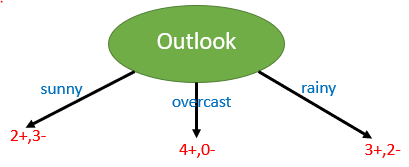

แต่ attribute เพียงตัวเดียวไม่สามารถแยกตัวอย่างการตัดสินใจเล่นเทนนิส(PlayTennis) ออกทั้งหมดได้ จึงต้องพิจารณา attribute ตัวอื่นเพื่อสร้าง node เพิ่มต่อไป จนกว่ากิ่งทุกกิ่งจะให้ผลลัพธ์แบบเดียวกันทั้งหมด เช่น กิ่งของ overcast ซึ่งจะให้ค่า Entropy เท่ากับ 0 (เอาไปหาค่าเกนก็ได้ค่าเกนที่มากที่สุด) จึงสามารถใส่ leaf ซึ่งเป็นส่วนตัดสินใจได้

# รายละเอียดการบ้าน
ข้อมูลที่จะนำมาใช้ในการสร้าง Decision Tree จะอยู่ในรูป **List of List** โดย
  - ค่าที่อยู่ใน index 0 ของลิสต์ภายในเป็น Dict ที่มีชื่อ feature attribute เป็น key และ ค่าของ feature attribute เป็น value 
  - ค่าที่อยู่ใน index 1 ของลิสต์ภายในเป็น ค่าของ target attribute (ในที่นี้คือ PlayTennis)



 **target attribute ไม่จำเป็นต้องมีแค่ Yes กับ No อาจจะมีมากกว่านั้นก็ได้ **
```
S = [ [{'Outlook': 'sunny', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'false'}, 'No'],
      [{'Outlook': 'sunny', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'true'}, 'No'],
      [{'Outlook': 'overcast', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'rainy', 'Temperature': 'mild', 'Humidity': 'high', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'rainy', 'Temperature': 'cool', 'Humidity': 'normal', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'rainy', 'Temperature': 'cool', 'Humidity': 'normal', 'Windy': 'true'}, 'No'],
      [{'Outlook': 'overcast', 'Temperature': 'cool', 'Humidity': 'normal', 'Windy': 'true'}, 'Yes'],
      [{'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'high', 'Windy': 'false'}, 'No'],
      [{'Outlook': 'sunny', 'Temperature': 'cool', 'Humidity': 'normal', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'rainy', 'Temperature': 'mild', 'Humidity': 'normal', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'normal', 'Windy': 'true'}, 'Yes'],
      [{'Outlook': 'overcast', 'Temperature': 'mild', 'Humidity': 'high', 'Windy': 'true'}, 'Yes'],
      [{'Outlook': 'overcast', 'Temperature': 'hot', 'Humidity': 'normal', 'Windy': 'false'}, 'Yes'],
      [{'Outlook': 'rainy', 'Temperature': 'mild', 'Humidity': 'high', 'Windy': 'true'}, 'No']    
] 
```
หากต้อง test บางฟังก์ชั่นที่เขียนไว้ สามารถใช้ข้อมูลนี้ในการทดสอบใน thonny,vscode, pycharm ได้ (การันตีว่าเป็นข้อมูลชุดเดียวกัน) 

### สำหรับผู้ที่ทำใน colab ให้โหลดไฟล์สำหรับงานนี้ได้[ที่นี่](https://drive.google.com/uc?export=view&id=1hHWIJnOQJLhTPy15mp83_BLumfGXOgV6)
- แล้วให้อัพโหลดขึ้น colab ตามขั้นตอนที่กำหนด

![](https://drive.google.com/uc?export=view&id=1hrTsk7AV7pLIpZefZnY-dEJhTlgZjrJq)

# สิ่งที่ต้องทำ
นิสิตเขียน 3 ฟังก์ชั่นดังนี้

**ทั้ง 3 ฟังก์ชั่น ห้ามแก้ไข Parameter ที่รับเข้ามา ไม่งั้นจะทำให้โค้ดส่วนที่พี่ ๆ เขียน พังครับ**

## งานที่ 1 ฟังก์ชั่นคืนค่าของ $S_{conditions}$
```
def get_rows(S, conditions):
``` 
- รับ `S` เก็บข้อมูลของเหตุการณ์ทั้งหมด อยู่ในรูป List of List ตามตัวอย่างข้างบน
- รับ `condition` (dict: `{feature_name: feature_value, ...}` ) เป็นเงื่อนไขของข้อมูลที่จะเอามาใช้คำนวณ Entropy (ถ้าเป็น Dict ว่าง {} หมายความว่าไม่มีเงื่อนไข)
- คืน `S` เป็นข้อมูลที่เป็นไปตาม `conditions` ที่กำหนด หากไม่มีเงื่อนไข (เป็น Dict ว่าง {}) ให้คืนค่าทุกตัว

ยกตัวอย่างเช่น หากเรียกใช้ฟังก์ชั่นนี้ โดยคำสั่ง \\
```get_rows(S, {'Outlook':'sunny'})```
จะคืนค่า
```
[[{'Outlook': 'sunny', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'false'}, 'No'],
[{'Outlook': 'sunny', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'true'}, 'No'], 
[{'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'high', 'Windy': 'false'}, 'No'], 
[{'Outlook': 'sunny', 'Temperature': 'cool', 'Humidity': 'normal', 'Windy': 'false'}, 'Yes'], 
[{'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'normal', 'Windy': 'true'}, 'Yes']]
``` 

ใช้คำสั่ง
```get_rows(S, {'Outlook':'sunny', 'Windy':'true'}) ``` จะคืนค่า
```
[[{'Outlook': 'sunny', 'Temperature': 'hot', 'Humidity': 'high', 'Windy': 'true'}, 'No'], 
[{'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'normal', 'Windy': 'true'}, 'Yes']]
```
ใช้คำสั่ง ```get_rows(S, {})``` จะคืนค่าข้อมูลทั้งหมด

## งานที่ 2 ฟังก์ชั่นคืนค่าของ $Entropy(S_{conditions})$
```
def Entropy(S, conditions):
```
- รับ `S` เก็บข้อมูลของเหตุการณ์ทั้งหมด อยู่ในรูป List of List ตามตัวอย่างข้างบน
- รับ `conditions` (dict: `{feature_name: feature_value, ...}` ) เป็นเงื่อนไขของข้อมูลที่จะเอามาใช้คำนวณ Entropy (ถ้าเป็น Dict ว่าง {} หมายความว่าไม่มีเงื่อนไข)
- คืนค่า `entropy` (float) ตามสมการข้างต้น

ยกตัวอย่างเช่น หากเรียกใช้ฟังก์ชั่นนี้ โดยคำสั่ง \\
```Entropy(S, {'Outlook':'sunny'})```

จะคืนค่า ```0.9709505944546686``` (อันนี้ก็คือ $Entropy(S_{Outlook=sunny})$)

ใช้คำสั่ง ```Entropy(S, {'Outlook':'sunny', 'Windy':'true'})``` 

จะคืนค่า ```1.0``` (อันนี้ก็คือ $Entropy(S_{Windy=true,Outlook=sunny})$)

ใช้คำสั่ง ```Entropy(S, {})``` 

จะคืนค่า ```0.9402859586706309``` (อันนี้ก็คือ $Entropy(S)$)

## งานที่ 3 ฟังก์ชั่นคืนค่าของ $Entropy(S_{conditions},X)$
```
def Entropy_with_feature(S, conditions, feature_name):
```
- รับ `S` เก็บข้อมูลของเหตุการณ์ทั้งหมด อยู่ในรูป List of List ตามตัวอย่างข้างบน
- รับ `conditions` (dict: `{feature_name: feature_value, ...}` ) เป็นเงื่อนไขของข้อมูลที่จะเอามาใช้คำนวณ Entropy (ถ้าเป็น Dict ว่าง {} หมายความว่าไม่มีเงื่อนไข) 
- รับ `feature_name` (string) เป็นชื่อของ feature attribute ที่ถูกเลือกมาสร้าง node
- คืนค่า `entropy` (float) ตามสมการข้างต้น

ยกตัวอย่างเช่น หากเรียกใช้ฟังก์ชั่นนี้ โดยคำสั่ง \\
```Entropy_with_feature(S, {'Windy':'true'}, 'Outlook' )``` 

จะคืนค่า ```0.3333333333333333``` (อันนี้ก็คือ $Entropy(S_{Windy=true}, Outlook)$)

ใช้คำสั่ง```Entropy_with_feature(S, {}, 'Outlook')``` 

จะคืนค่า ```0.6935361388961918``` (อันนี้ก็คือ $Entropy(S, Outlook)$) 


## ข้อกำหนดการบ้าน
- ห้าม import library อื่นๆเข้ามาใช้ในการบ้านนี้
- อนุญาตให้สร้างฟังก์ชันเพิ่มเติมได้ (ต้องเขียนลงใน code cell เดียวกันเท่านั้น)
- ไม่อนุญาตให้แก้โค้ดส่วนอื่นของการบ้าน
- ทั้ง 3 ฟังก์ชั่น ห้ามแก้ไข Parameter ที่รับเข้ามา ไม่งั้นจะทำให้โค้ดส่วนที่พี่ ๆ เขียน พังครับ (หากแก้ไขค่า รบกวนแก้กลับมาเป็นเหมือนเดิมด้วย)
- วิธีการส่งการบ้าน
  - ส่งเฉพาะฟังก์ชันที่ให้เขียนในโจทย์เท่านั้น
  - ตั้งชื่อแฟ้มโปรแกรม python ที่จะส่ง ให้เป็น 
hw9_เลขประจำตัวนิสิต.py  เช่น hw9_6430000021.py
  - ส่งแฟ้มใน attachment box ของ assignment hw9 ของ mycourseville
- รายละเอียดอื่นๆ
  - รับประกันว่าข้อมูลในทุก attributes เป็น categorical value (discrete values) กล่าวคือ ไม่มีข้อมูลที่เป็นตัวเลขหลายค่า (numerical)
  - รับประกันว่า target attribute มีแค่ตัวเดียว แต่ "ค่า"ของ target attribute ที่จะทดสอบอาจมีได้มากกว่า 2 ค่า
 - รับประกันว่าข้อมูลทุกตัวในลิสต์ ไม่มีข้อมูลค่าสูญหาย (Missing values)

 


In [ ]:
! pip install python-igraph==0.9.6
! pip install cairocffi

In [ ]:
# Write the three required functions in this cell only.
# Addtional functions can be added here.
# other modules cannot be imported
# เขียนชื่อ นามสกุล เลขประจำตัวนิสิต
import math 


#---------------------------------------
def get_rows(S, conditions):


#---------------------------------------
def Entropy(S, conditions):


#---------------------------------------
def Entropy_with_feature(S, conditions, feature_name):


#---------------------------------------

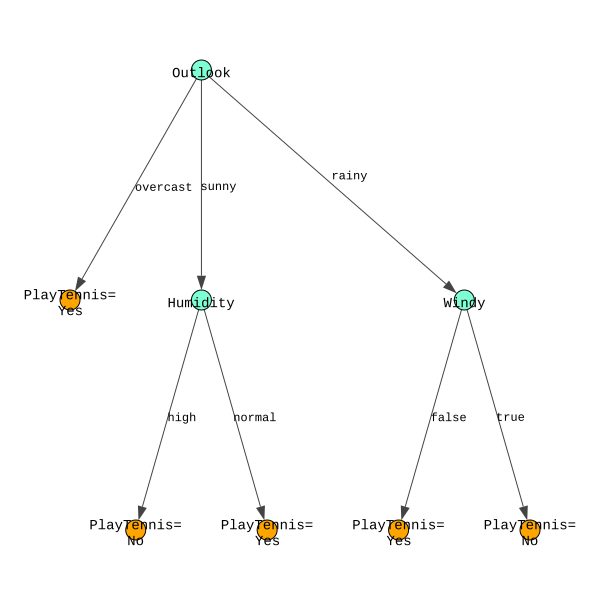

In [ ]:
### DON'T CHANGE THESE CODES #####
from igraph import *

def dataPrepare() :
  file = open("climate_for_tennis.csv", "r")
  data = []
  att = file.readline().strip().split(",")
  feature = att[1:-1]
  target = att[-1]
  row_data = file.readline().strip()
  while len(row_data)>0:
    row_data = row_data.split(",")
    lorem = []
    temp = dict()
    for i in range(1,len(row_data)-1) :
      temp[att[i]] = row_data[i]
    lorem.append(temp)
    lorem.append(row_data[-1])
    data.append(lorem)
    row_data = file.readline().strip()
  return data, feature, target

def findParent(attribute, conditions) :
  ent_target, no_interest, iaf  = targetOp(S, target_att, conditions) 
  if ent_target==0 : return target_att+"=\n"+iaf 
  max_gain = 0 ; parent = ""
  for feature in attribute :
    gain = ent_target - Entropy_with_feature(S, conditions, feature) 
    if gain > max_gain :
      max_gain = gain
      parent = feature
  return parent

def DFS(parent, stack_used, num_node) :
  edge_names = getName(get_rows(S,stack_used), parent)
  unused_att = [e for e in feature_att if e not in stack_used and e != parent]
  for name in edge_names :
    stack_used[parent] = name 
    val = findParent(unused_att, stack_used)
    no_graph = len(vertice)
    vertice[no_graph] = val
    relation.append((num_node,no_graph))
    edge.append(name)

    if val in unused_att :
      DFS(val, stack_used, no_graph)
    stack_used.pop(parent)

def targetOp(S, target, conditions) :
    entropy = Entropy(S, conditions)
    count = count_features(S, conditions)
    return entropy, count, leaf(S, conditions)

def count_features(S, conditions):
    if len(conditions) == 0:
        return len(S)
    return len(get_rows(S, conditions))

def leaf(S, conditions):
    if Entropy(S, conditions)==0:
        s = get_rows(S, conditions)
        return s[0][1]
    else:
        return ''

def getName(S, att) :
  if att==target_att :
    return list({e[1] for e in S})
  name = []
  for row in S :
    if row[0][att] not in name :
      name.append(row[0][att])
  return name
  
S, feature_att, target_att = dataPrepare()
stack = {}
root = findParent(feature_att,{})

vertice = {0:root} #map(key=int, value=node&&leaf) 
edge = [] #list(value of feature_att)
relation = [] #list of tuple of two_ints
DFS(root,stack,0)

label = [int(e) for e in range(len(vertice))]
vs_label = [vertice[e] for e in label]  #list of node&&leaf (sorted)
non_leaf = [e for e in vs_label if e.find("=")==-1]

g = Graph(n = len(vertice), directed=True)
g.add_edges(relation) #list of tuple of two_ints
g.vs["label"] = vs_label #list of node&&leaf (sorted)
g.es["label"] = edge  #list(value of feature_att)

for i in range(len(vs_label)) : #distinct color for node && leaf
  if vs_label[i].find("=")==-1 :
     g.vs[i]["color"] = "aquamarine"
  else :
     g.vs[i]["color"] = "orange"
layout = g.layout_sugiyama() #tree_form
plot(g, layout=layout, margin=(70,70,70,70))

# กิตติกรรมประกาศ
ขอบคุณรศ. ดร.สมชาย ประสิทธิ์จูตระกูล ที่ช่วยเหลือและให้คำแนะนำในการออกโจทย์การบ้านนี้

# บรรณานุกรม
[1] รศ. ดร.ญาใจ ลิ่มปิยะกรณ์. (2553). **การทำเหมืองข้อมูล**. กรุงเทพฯ: ภาควิชาวิศวกรรมคอมพิวเตอร์ จุฬาลงกรณ์มหาวิทยาลัย. \\
[2] รศ. ดร.ปริญญา สงวนสัตย์. (2562). **Artificial Intelligence with Machine Learning, AI สร้างได้ด้วยแมชชีนเลิร์นนิ่ง**. นนทบุรี: สำนักพิมพ์ ไอดีซี พรีเมียร์.

#เนื้อหานอกบทเรียน (ไม่เกี่ยวกับการบ้าน, ไม่ออกสอบ 1000%, แก้โค้ดได้ตามสบาย )
การทำ decision tree ในด้านสายงาน Machine Learning จริงๆนั้น ไม่นิยมเขียนอัลกอริทึมเองทั้งหมด แต่จะอาศัยบริการจาก library แทน โดยในที่นี่ จะสาธิตการทำ decision tree โดยใช้ library numpy, pandas และ sklearn

ขอบคุณโค้ดจาก: https://github.com/Luel-Hagos/Play-Tennis-Implementation-Using-Sklearn-Decision-Tree-Algorithm

## Load libraries
- numpy เป็น library ที่ใช้ในการคำนวณทางคณิตศาสตร์และวิทยาศาสตร์
- pandas เป็น library ที่ใช้สำหรับจัดการข้อมูลไฟล์ csv เพื่อให้แสดงออกอยู่ในรูปตาราง
- sklearn เป็น เป็น library ที่รวมรวมอัลกอริทึมที่ใช้ในงานด้าน machine learning

In [ ]:
import numpy as np #เฉพาะตัวนี้ เดี๋ยวจะได้เรียนแน่นอน
import pandas as pd 
from sklearn import metrics 

## Import the Dataset

In [ ]:
df=pd.read_csv("climate_for_tennis.csv")
value=['Outlook','Temperature','Humidity','Windy']
df

,Day,Outlook,Temperature,Humidity,Windy,PlayTennis
0,D1,sunny,hot,high,False,No
1,D2,sunny,hot,high,True,No
2,D3,overcast,hot,high,False,Yes
3,D4,rainy,mild,high,False,Yes
4,D5,rainy,cool,normal,False,Yes
5,D6,rainy,cool,normal,True,No
6,D7,overcast,cool,normal,True,Yes
7,D8,sunny,mild,high,False,No
8,D9,sunny,cool,normal,False,Yes
9,D10,rainy,mild,normal,False,Yes


## Data Analysis

In [ ]:
len(df) #จำนวนข้อมูลทดสอบ

14

In [ ]:
df.shape #บอกจำนวนแถวข้อมูล,หลักของattribute (row,column)

(14, 6)

In [ ]:
df.head()  #โชว์ข้อมูลช่วงแรกๆ

,Day,Outlook,Temperature,Humidity,Windy,PlayTennis
0,D1,sunny,hot,high,False,No
1,D2,sunny,hot,high,True,No
2,D3,overcast,hot,high,False,Yes
3,D4,rainy,mild,high,False,Yes
4,D5,rainy,cool,normal,False,Yes


In [ ]:
df.tail() #โชว์ข้อมูลช่วงท้ายๆ

,Day,Outlook,Temperature,Humidity,Windy,PlayTennis
9,D10,rainy,mild,normal,False,Yes
10,D11,sunny,mild,normal,True,Yes
11,D12,overcast,mild,high,True,Yes
12,D13,overcast,hot,normal,False,Yes
13,D14,rainy,mild,high,True,No


## Preparing the Data (Data Slicing)

In [ ]:
#ก่อนที่จะนำข้อมูลไป training จะต้องทำการจัดเตรียมข้อมูลก่อน (preprocessing)
#เนื่องจาก Machine Learning algorithm ของ sklearn รับเฉพาะข้อมูลประเภทตัวเลข (int, float) เท่านั้น
#ดังนั้นจึงต้องแปลงค่าของ attribute ทุกตัวเป็น int 
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()    #เรียกใช้ฟังก์ชั่น LabelEncoder() ของ sklearn 
df=df.apply(string_to_int.fit_transform)       #แปลงค่า
df

,Day,Outlook,Temperature,Humidity,Windy,PlayTennis
0,0,2,1,0,0,0
1,6,2,1,0,1,0
2,7,0,1,0,0,1
3,8,1,2,0,0,1
4,9,1,0,1,0,1
5,10,1,0,1,1,0
6,11,0,0,1,1,1
7,12,2,2,0,0,0
8,13,2,0,1,0,1
9,1,1,2,1,0,1


In [ ]:
# แบ่งข้อมูลออกเป็น feature กับ target (ในตันฉบับใช้ attribute set กับ label)
feature_cols = ['Outlook','Temperature','Humidity','Windy']
X = df[feature_cols ]              # เก็บ feature ใน X
y = df.PlayTennis                  # เก็บ target ใน y

In [ ]:
#ในการทำ machine learning ทั่วไป มักจะทำการแบ่งข้อมูลออกเป็น 2 ชุด นั่นคือ ข้อมูลเพื่อสอนโมเดล (training data) กับ ข้อมูลเพื่อทดสอบโมเดล (testing data)
#ต่อไปนี้คือคำสั่งแบ่งข้อมูลโดยใช้ train_test_split ของ sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training and Making Predictions
  - DecisionTreeClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
#ในขั้นตอนฝึกสอน (training) จะทำการ import ตัวโมเดลหรือตัวจำแนกข้อมูล (classifier) จาก sklearn เพื่อนำมาฝึกสอนกับ training data ที่เตรียมไว้
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)   # สร้าง object classifier
classifier.fit(X_train, y_train)                                            # ทำการฝึกสอนโมเดล (fit)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred= classifier.predict(X_test)                 #ทดสอบทำนายผลลัพธ์ด้วย testing data

In [ ]:
#วัดค่าความแม่นยำของโมเดลโดยใช้ accuracy_score
from sklearn.metrics import accuracy_score          
#แสดงผลการเทียบระหว่างผลลัพธ์ที่ทำนาย กับผลลัทธ์จริง
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   
#ผลลัพธ์ความแม่นยำเปลี่ยนแปลงได้ ขึ้นกับการแบ่ง training data กับ testing data

Accuracy: 0.8


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  #โชว์ข้อมูลระหว่างผลลัพธ์ที่ทำนาย กับผลลัทธ์จริง
data_p

,Actual,Predicted
9,1,1
2,1,1
4,1,1
0,0,0
11,1,0


## Evaluating the Algorithm
ในส่วนนี้จะการประเมินผลด้วย confusion_matrix และ classification_report
โดย confusion_matrix จะบอกค่าที่ทำนายได้ VS ค่าที่เป็นจริงๆ
```
[[True Negative, False Positive]
 [False Negative, True Positive]]
```
ถ้าให้เปรียบเทียบง่ายๆก็แบบนี้ (จะได้เจออีกทีตอนเรียนสถิติ)

![](https://i.redd.it/1rxo44rmhec41.png)

ส่วน classification_report เป็นค่าที่ได้จากการคำนวณ 4 ค่าที่ได้กล่าวมาข้างบน
หากสนใจในรายละเอียด อ่านต่อได้[ที่นี่](https://medium.com/@cheng3374/%E0%B8%A7%E0%B8%B1%E0%B8%94%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%AA%E0%B8%B4%E0%B8%97%E0%B8%98%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%9E-model-%E0%B8%88%E0%B8%B2%E0%B8%81-confusion-matrix-69d391bcd48)




In [ ]:
#การประเมินผลด้วย confusion_matrix และ classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1 0]
 [1 3]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



## Visualizing Decision Trees
ในส่วนนี้ จะทำการโชว์ข้อมูลออกมาเป็นกราฟต้นไม้
โดยที่จะมีความแตกต่างกับ decision tree ที่เราสร้างเพราะ
  - มีการแปลงข้อมูลเป็นตัวเลข แล้วใช้ช่วงในการแบ่งข้อมูลแทน
  - ข้อมูลบางส่วนถูกแบ่งไปทำ testing data
 
แต่สังเกตเห็นได้ว่า บริเวณ leaf (node ปลายสุด) จะมีค่า entropy เป็นศูนย์ ซึ่งก็เป็นการยืนยันว่าการสร้าง decision tree เป็นการแบ่งข้อมูลให้เป็นระเบียบ เพื่อให้ง่ายต่อการใช้ตัดสินใจนั่นเอง (รูปร่างต้นไม้เปลี่ยนแปลงได้ ขึ้นกับการแบ่ง training data กับ testing data)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


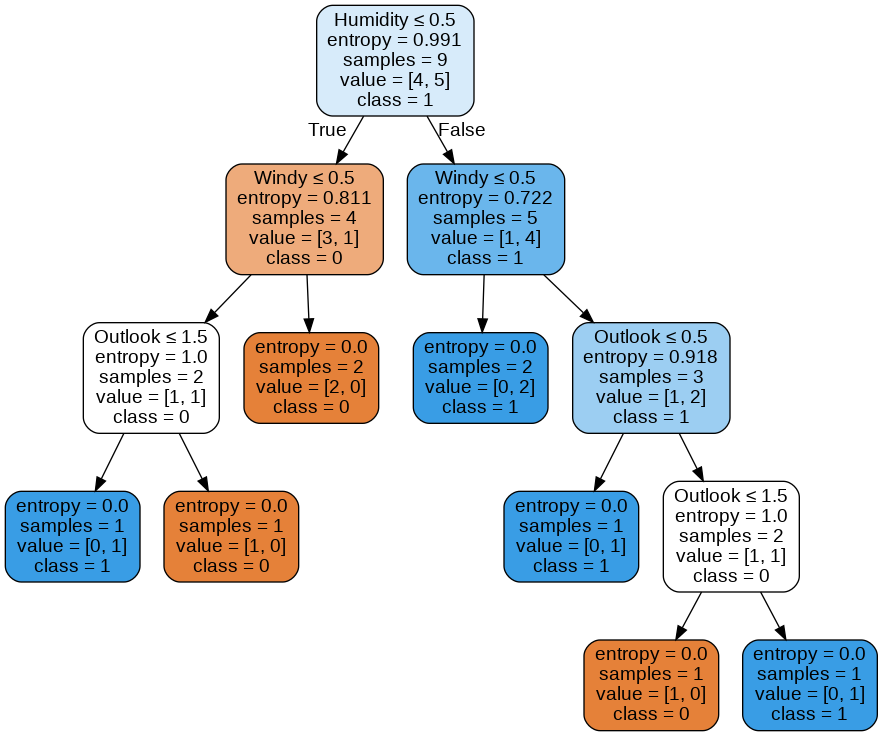

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

### แหล่งข้อมูลแนะนำ สำหรับคนต้องการเรียนรู้การสร้าง Decision tree
  - GeeksForGeeks : https://www.geeksforgeeks.org/decision-tree-implementation-python/
  - ช่อง prasertcbs : https://youtu.be/CrlmjqHXhqI
  - ช่อง BorntoDev : https://youtu.be/0nDRcbd8jJA